# Initial Setup

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("airline-passenger-traffic.csv")
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')

# Time Series Analysis

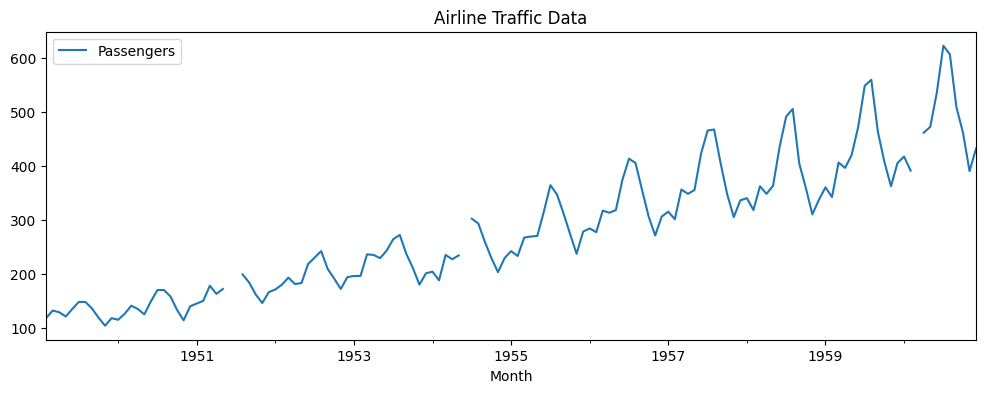

In [5]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline Traffic Data")
plt.show(block=False)

# Treating With Missing Values

In [6]:
# Mean Imputation
# Last Observation carried forward
# Linear Interpolation ( Trend better)
# Seasonal + Linear Interpolation

# 1- Mean Imputation - Not a great if there is a up trend can cause over/under estimation

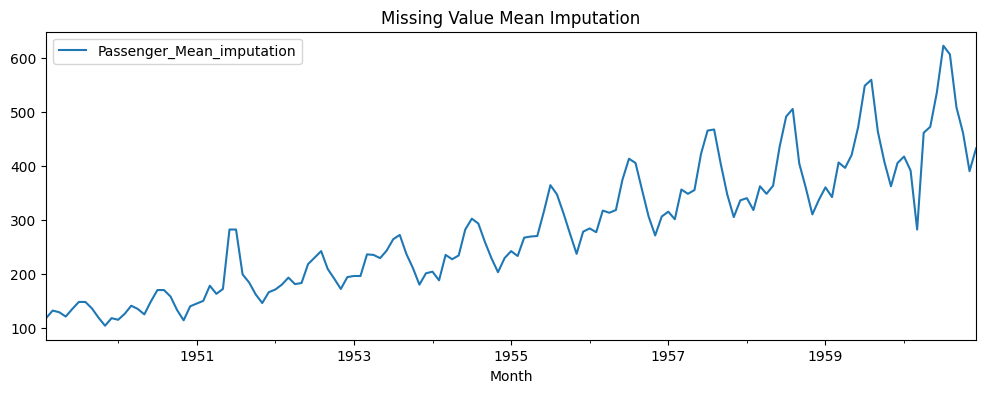

In [7]:
data = data.assign(Passenger_Mean_imputation = data.Passengers.fillna(data.Passengers.mean()))
data[['Passenger_Mean_imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Missing Value Mean Imputation")
plt.show(block=False)

# 2 - Linear Interpolation ( Trend better)

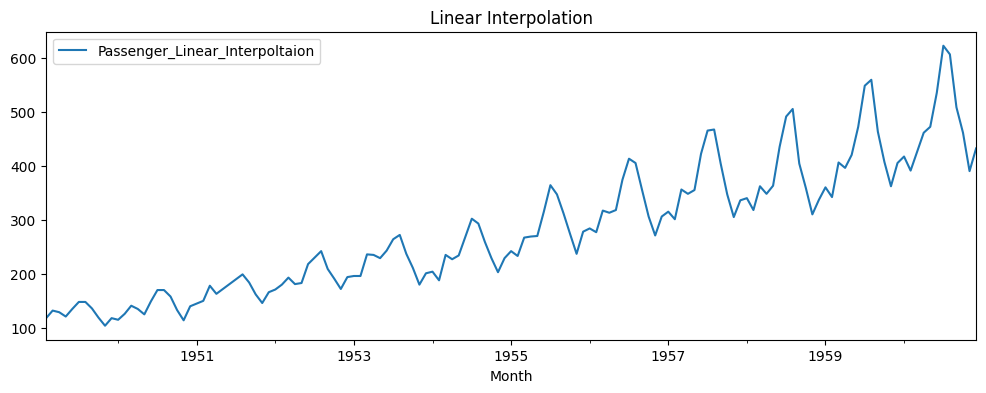

In [8]:
data = data.assign(Passenger_Linear_Interpoltaion = data.Passengers.interpolate(method='linear'))
data[['Passenger_Linear_Interpoltaion']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Linear Interpolation")
plt.show(block=False)

In [9]:
data2 = pd.read_csv("Metrail+dataset.csv")

In [10]:
data2.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [11]:
#data2['Month'] = pd.to_datetime(data2['Month'], format='%m-%y')
data2 = data2.set_index('Month')

In [12]:
data2.isnull().sum()

Travellers('000)    11
dtype: int64

# 3 - Last Observation Observed

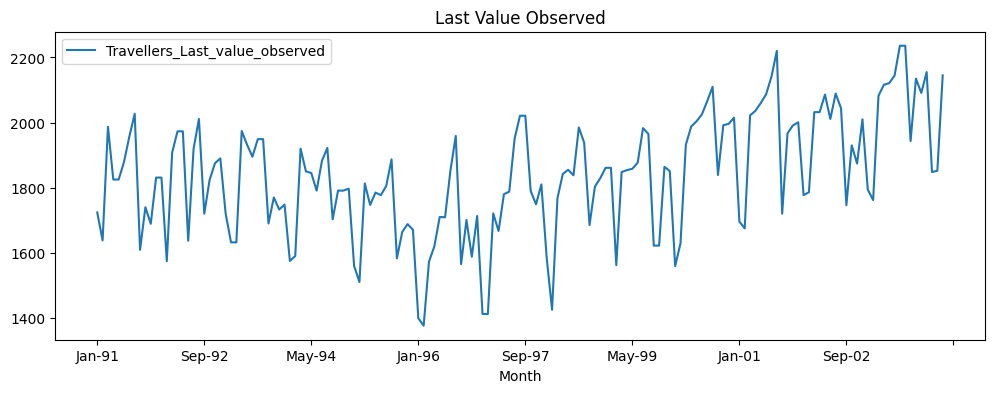

In [13]:
data2 = data2.assign(Travellers_Last_value_observed = data2["Travellers('000)"].fillna(method='pad'))
data2[['Travellers_Last_value_observed']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Last Value Observed")
plt.show(block=False)

In [14]:
data2['Travellers_Last_value_observed'].mean()

1838.685534591195

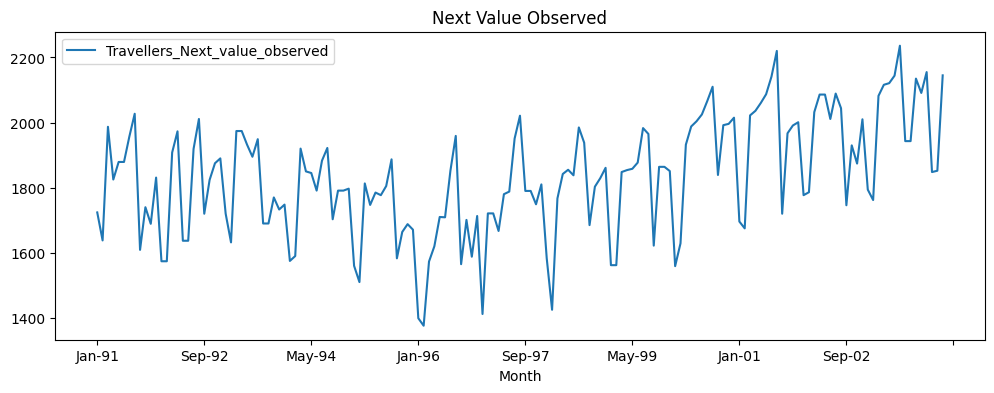

In [15]:
data2 = data2.assign(Travellers_Next_value_observed = data2["Travellers('000)"].fillna(method='bfill'))
data2[['Travellers_Next_value_observed']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Next Value Observed")
plt.show(block=False)

In [16]:
data2['Travellers_Next_value_observed'].mean()

1834.446540880503

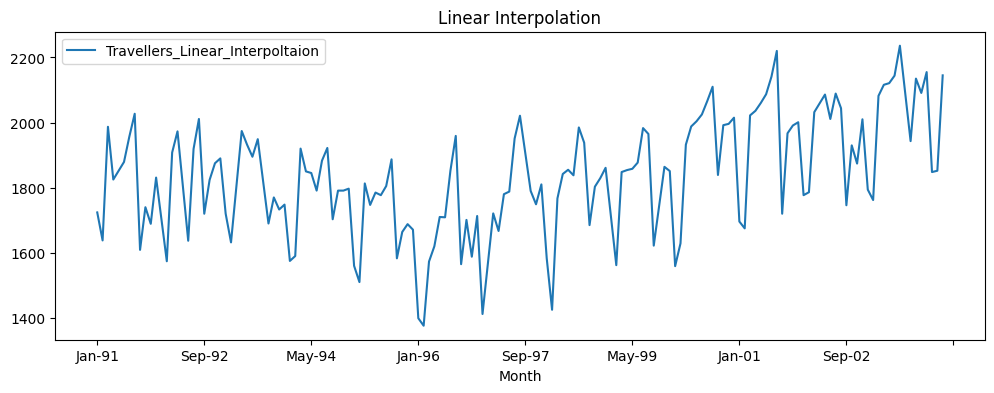

In [17]:
data2 = data2.assign(Travellers_Linear_Interpoltaion = data2["Travellers('000)"].interpolate(method='linear'))
data2[['Travellers_Linear_Interpoltaion']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Linear Interpolation")
plt.show(block=False)

In [18]:
data2['Travellers_Linear_Interpoltaion'].mean()

1836.566037735849

# Outliers

In [19]:
# box plot and interquartile range 1st quartile - 1.5* quartile range to 3rd quartile + 1.5* quartile range
"""
1. Replace with mean median or mode - not accurate
2. Trimming - may not work always
3. Lower and upper capping
"""
# Extreme Value Analysis
# Box Plot
# Histogram

# For this example no outliers

'\n1. Replace with mean median or mode - not accurate\n2. Trimming - may not work always\n3. Lower and upper capping\n'

### Box Plot and Inter Quartile Range

In [20]:
import seaborn as sns

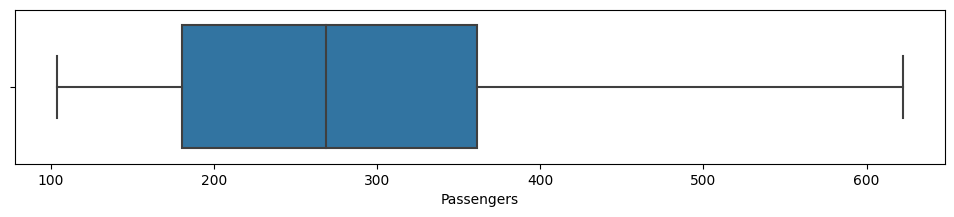

In [21]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Passengers'], whis=1.5)

In [22]:
data['Passengers'].describe()

count    139.000000
mean     281.949640
std      120.167837
min      104.000000
25%      180.500000
50%      269.000000
75%      361.000000
max      622.000000
Name: Passengers, dtype: float64

### Histogram

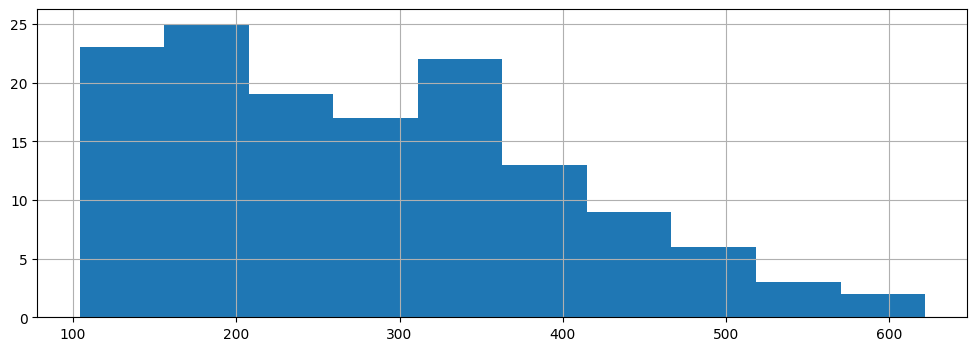

In [23]:
fig = data.Passengers.hist(figsize=(12,4))

# Time Series Decomposition

### Additive Seasonal Decomposition

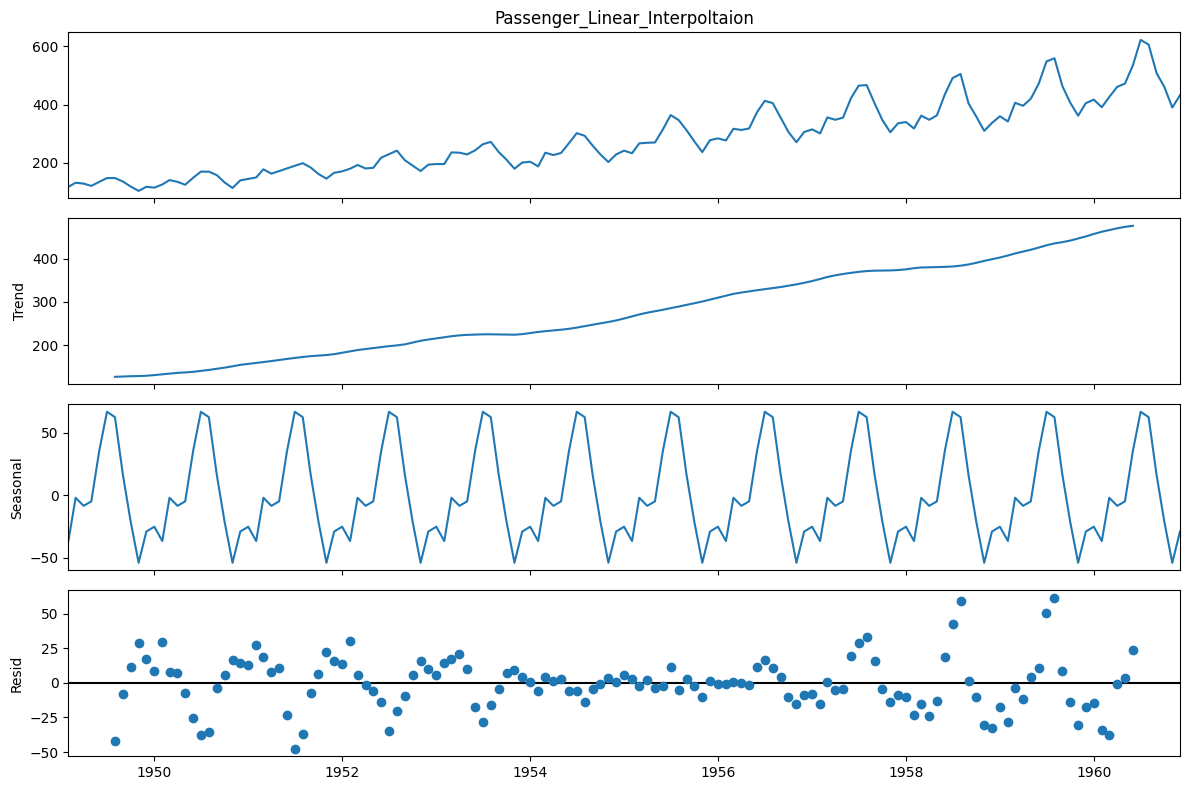

In [24]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(data.Passenger_Linear_Interpoltaion, model='additive')
fig = decomposition.plot()
plt.show()

### Multiplicative Seasonal Decomposition

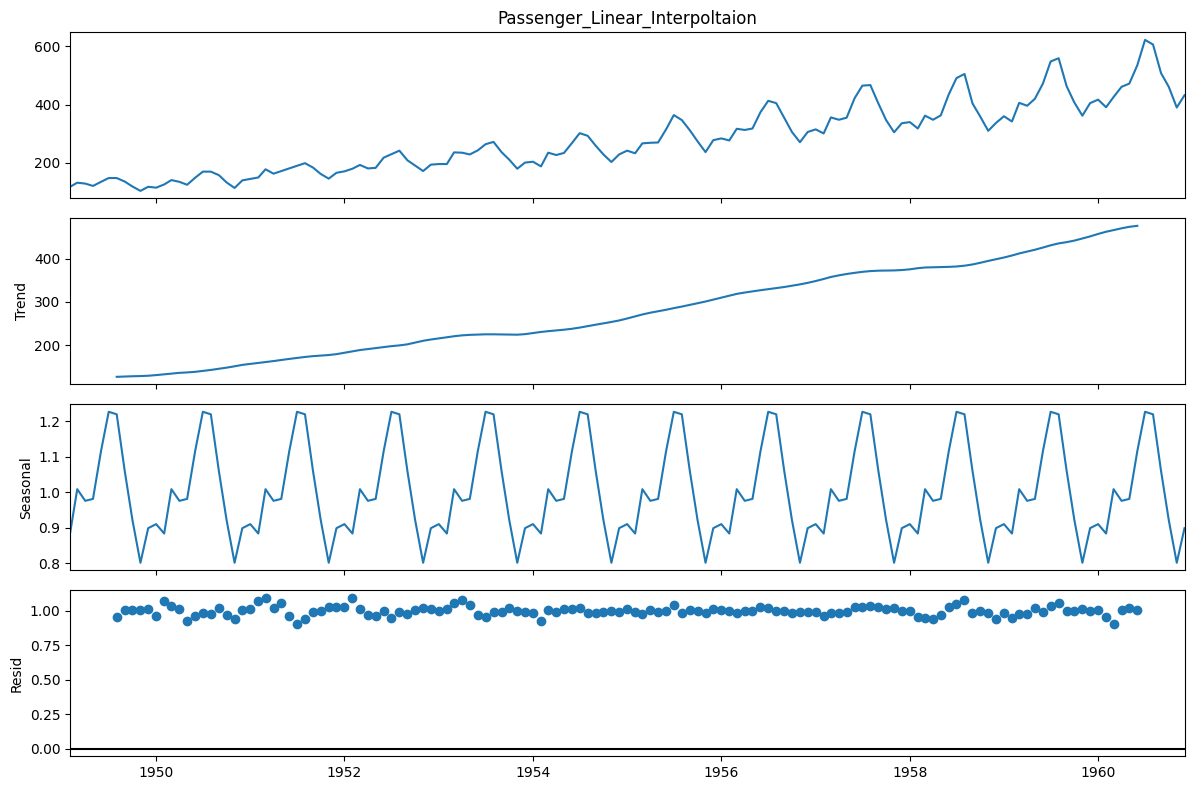

In [25]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(data.Passenger_Linear_Interpoltaion, model='multiplicative')
fig = decomposition.plot()
plt.show()

# ForeCasting Methods

In [26]:
# Naive Method
# - Forecast = Last month’s sales
# - Stock Price

# Simple Average Method
# - Forecast = Average of all past months’ sales

# Drift Method
# - Does not capture the seasonality

In [27]:
# Spliting the data

In [28]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

### Naive Method

In [29]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len - 1]

### Plot train, test and forecast

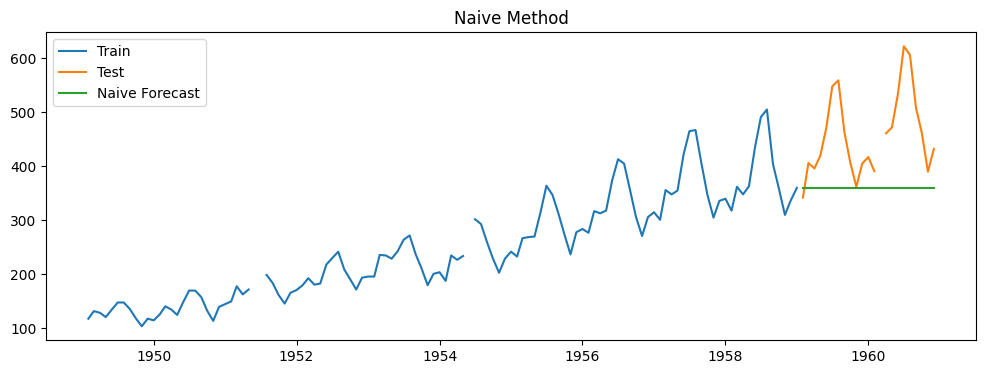

In [30]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

### Simple Average Method

In [31]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

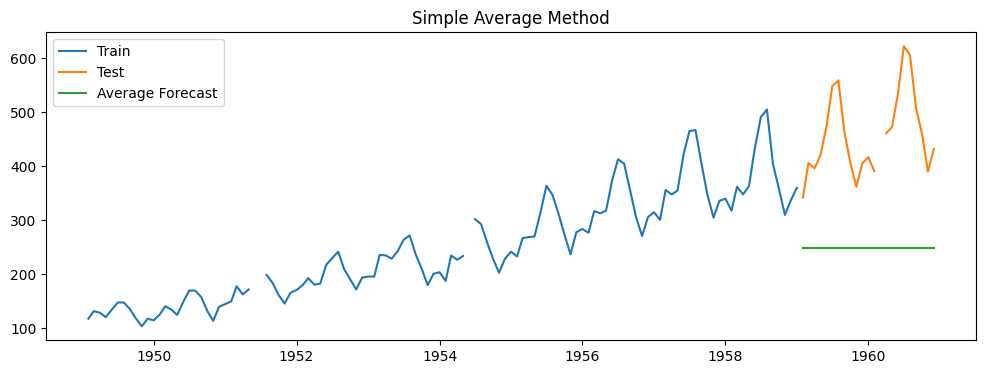

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

Forecast Errors:
    
    Mean Forecast Error (MFE) = 1/n * sum(y - y_hat) (forecast bias)
    
    Mean Absolute Error (MAE) = 1/n * sum(abs(y - y_hat)) 
    
    Mean Absolute Percentage Error (MAPE) = 100/n * sum(abs((y - y_hat)/y))
    
    Mean Squared Errors (MSE) = i/n * sum((y-yhat)**2)
    
    Root Mean Squared Errors (RMSE) = square root of(MSE)

## Calculate RSME and MAPE to evaluate forecast

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
rsme = np.sqrt(mean_squared_error(test['Passenger_Linear_Interpoltaion'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passenger_Linear_Interpoltaion'] - y_hat_naive['naive_forecast'])/test['Passenger_Linear_Interpoltaion'])*100,2)
results = pd.DataFrame({'Method':['Naive Method'], 'RMSE':[rsme], 'Mape':[mape],})

In [35]:
results

,Method,RMSE,Mape
0,Naive Method,121.4,19.68


In [36]:
rsme_avg = np.sqrt(mean_squared_error(test['Passenger_Linear_Interpoltaion'], y_hat_avg['avg_forecast'])).round(2)
mape_avg = np.round(np.mean(np.abs(test['Passenger_Linear_Interpoltaion'] - y_hat_avg['avg_forecast'])/test['Passenger_Linear_Interpoltaion'])*100,2)
results_avg = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE':[rsme_avg], 'Mape':[mape_avg],})

In [37]:
results_avg

,Method,RMSE,Mape
0,Simple Average Method,220.35,44.16


### Practice

In [38]:
# data = pd.read_csv("exchange-rate-twi.csv")
# data = data.set_index("Month")

# train_len = 212
# train = data[0:train_len]
# test = data[train_len:]

# # Naive
# y_hat_naive = test.copy()
# y_hat_naive['naive_forecast'] = train['Exchange Rate TWI'][train_len - 1]

# # Simple Average
# y_hat_avg = test.copy()
# y_hat_avg['avg_forecast'] = train['Exchange Rate TWI'].mean()


# # NAIVE
# rsme = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['naive_forecast'])).round(2)
# mape = np.round(np.mean(np.abs(test['Exchange Rate TWI'] - y_hat_naive['naive_forecast'])/test['Exchange Rate TWI'])*100,2)
# results = pd.DataFrame({'Method':['Naive Method'], 'RMSE':[rsme], 'Mape':[mape]})

# # SAM
# rsme_avg = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['avg_forecast'])).round(2)
# mape_avg = np.round(np.mean(np.abs(test['Exchange Rate TWI'] - y_hat_avg['avg_forecast'])/test['Exchange Rate TWI'])*100,2)
# results_avg = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE':[rsme_avg], 'Mape':[mape_avg]})


# # SMA
# ma_window = 6
# y_hat_sma = data.copy()
# y_hat_sma['sma_forecast'] = y_hat_sma['Exchange Rate TWI'].rolling(ma_window).mean()
# y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
# mape_sma = np.round(np.mean(np.abs(test['Exchange Rate TWI'] - y_hat_sma['sma_forecast'])/test['Exchange Rate TWI'])*100,2)
# rsme_sma = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(2)
# results_sma = pd.DataFrame({'Method':['Simple Moving Average Method'], 'RMSE':[rsme_sma], 'Mape':[mape_sma]})

# pd.concat([results,results_avg, results_sma])

## Simple Moving Average Method - Can not Capture the seasonality

(23, 3)


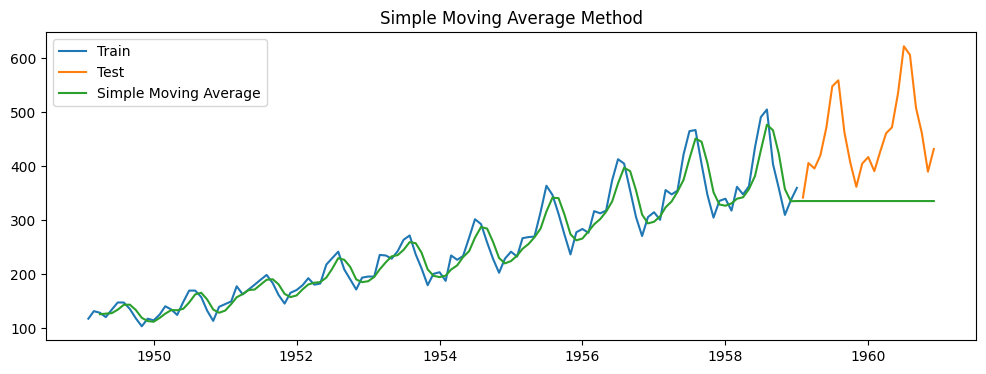

In [79]:
ma_window = 3 # 12 month moving windows

#Null Treatment
data = data.assign(Passengers = data.Passengers.interpolate(method='linear'))
train_len = 120
train = data[0:train_len]
test = data[train_len:]

test = data[train_len:]
print(test.shape)

y_hat_sma = data.copy()
y_hat_sma['sma_forecast'] = y_hat_sma['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average')
plt.legend(loc='best')
plt.title("Simple Moving Average Method")
plt.show()

## Errors

In [68]:
mape_sma = np.round(np.mean(np.abs(test['Passengers'] - y_hat_sma['sma_forecast'])/test['Passengers'])*100,2)
rsme_sma = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
results_sma = pd.DataFrame({'Method':['Simple Moving Average Method'], 'RMSE':[rsme_sma], 'Mape':[mape_sma]})

In [69]:
pd.concat([results,results_avg, results_sma])

,Method,RMSE,Mape
0,Naive Method,121.40,19.68
0,Simple Average Method,220.35,44.16
0,Simple Moving Average Method,141.52,24.68


## Weighted Moving Average

### 1 - Simple Exponential Smoothing (Captures the level of the timeseries)

In [70]:
alpha = 0.2

# lt = alpha * yt + (1-alpha).lt_1
# lt_1 = alpha * yt_1 + (1-alpha).lt_2
# lt_2 = alpha * yt_2 + (1-alpha).lt_3
# lt+2 = alpha * yt + alpha.(1-alpha).yt_1 + alpha.(1-alpha)square.yt_2

In [71]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


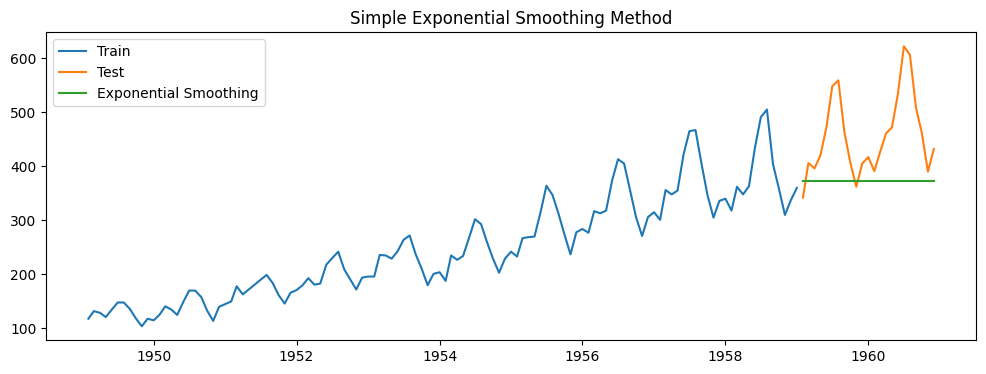

In [72]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_ses
         ['ses_forecast'],label='Exponential Smoothing')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [92]:
mape_ses = np.round(np.mean(np.abs(test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)
rsme_ses = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
results_ses = pd.DataFrame({'Method':['Simple Exponential Smoothing Method'], 'RMSE':[rsme_ses], 'Mape':[mape_ses]})

In [93]:
results_ses

,Method,RMSE,Mape
0,Simple Exponential Smoothing Method,112.15,17.55


### 2 - Holt's Exponential Smoothing - Both level and trend of a time series in the forecast

- captures the trend component
- Alpha for level
- beta parameter to tune - trend parameter

In [104]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized = False)
print(model_fit.params)
y_hat_hes = test.copy()
y_hat_hes['hes_forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 131.93333333333325, 'initial_trend': -0.5333333333333243, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


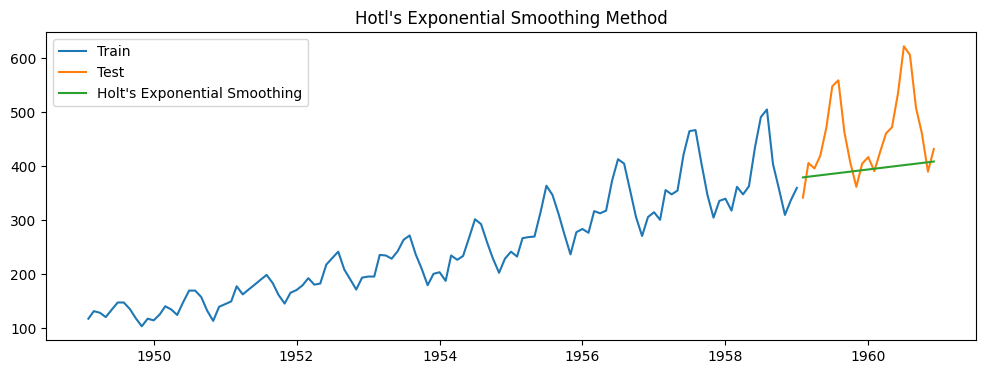

In [106]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hes['hes_forecast'],label='Holt\'s Exponential Smoothing')
plt.legend(loc='best')
plt.title("Hotl's Exponential Smoothing Method")
plt.show()

In [107]:
mape_hes = np.round(np.mean(np.abs(test['Passengers'] - y_hat_hes['hes_forecast'])/test['Passengers'])*100,2)
rsme_hes = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hes['hes_forecast'])).round(2)
results_hes = pd.DataFrame({'Method':['Holts Exponential Smoothing Method'], 'RMSE':[rsme_hes], 'Mape':[mape_hes]})

In [108]:
pd.concat([results,results_avg, results_sma, results_ses, results_hes])

,Method,RMSE,Mape
0,Naive Method,121.40,19.68
0,Simple Average Method,220.35,44.16
0,Simple Moving Average Method,141.52,24.68
0,Simple Exponential Smoothing Method,112.15,17.55
0,Holts Exponential Smoothing Method,94.68,13.82


### 3 -Holt-Winters's Exponential Smoothing
- Captures the seasonal component along with Level and Trend
- alpha - For level
- beta - For trend
- gamma - for seasonality weight 0< gamma < 1

In [109]:
# yt+1 = lt + bt + S(t+1-m)
# The holt's exponential smoothing technique forecasts based on the level and trend of a time series. 
# 'Holt-Winters' Exponential Smoothing technique which forecasts based on level, trend and seasonality 
# of a time series
# Additive model - Seasonality is not a function of a level
# Multiplicative model - Seasonality is a function of a level

In [118]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), 
                             seasonal_periods=12, 
                             trend='add', 
                             seasonal='add')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.2359871688460618, 'smoothing_trend': 1.0646820853386193e-07, 'smoothing_seasonal': 0.7640123499192614, 'damping_trend': nan, 'initial_level': 119.09355785760694, 'initial_trend': 2.311492226751534, 'initial_seasons': array([ -3.40261027,   9.1132648 ,   4.00787799,  -4.69288975,
         9.44673484,  21.70770597,  19.78584662,   5.68203799,
       -13.1763277 , -27.86706226, -11.71689191, -14.83292247]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


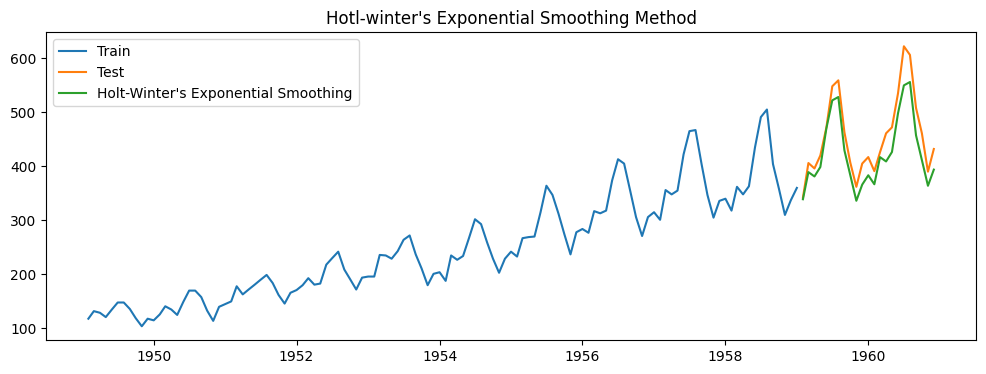

In [119]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hwa['hwa_forecast'],label='Holt-Winter\'s Exponential Smoothing')
plt.legend(loc='best')
plt.title("Hotl-winter\'s Exponential Smoothing Method")
plt.show()

In [130]:
mape_hwa = np.round(np.mean(np.abs(test['Passengers'] - y_hat_hwa['hwa_forecast'])/test['Passengers'])*100,2)
rsme_hwa = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
results_hwa = pd.DataFrame({'Method':['Holt-Winter\'s Exponential Smoothing Method Additive'], 'RMSE':[rsme_hwa], 'Mape':[mape_hwa]})

In [121]:
pd.concat([results,results_avg, results_sma, results_ses, results_hes, results_hwa])

,Method,RMSE,Mape
0,Naive Method,121.40,19.68
0,Simple Average Method,220.35,44.16
0,Simple Moving Average Method,141.52,24.68
0,Simple Exponential Smoothing Method,112.15,17.55
0,Holts Exponential Smoothing Method,94.68,13.82
0,Holt-Winter's Exponential Smoothing Method,35.70,6.72


## Multiplicative Model

In [122]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), 
                             seasonal_periods=12, 
                             trend='add', 
                             seasonal='mul')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwm = test.copy()
y_hat_hwm['hwm_forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.37835136920941576, 'smoothing_trend': 6.238522289633114e-07, 'smoothing_seasonal': 0.6216483796220295, 'damping_trend': nan, 'initial_level': 126.1402035299782, 'initial_trend': 2.8067926091603796, 'initial_seasons': array([0.91510334, 1.00907837, 0.95893837, 0.88377805, 0.96394598,
       1.04702923, 1.03915031, 0.94694355, 0.8247257 , 0.73335914,
       0.84770714, 0.84709932]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


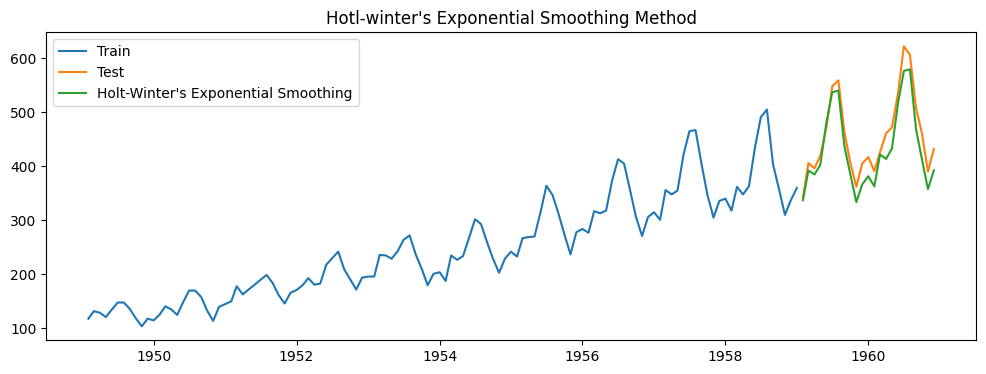

In [123]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hwm['hwm_forecast'],label='Holt-Winter\'s Exponential Smoothing')
plt.legend(loc='best')
plt.title("Hotl-winter\'s Exponential Smoothing Method")
plt.show()

In [128]:
mape_hwm = np.round(np.mean(np.abs(test['Passengers'] - y_hat_hwm['hwm_forecast'])/test['Passengers'])*100,2)
rsme_hwm = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hwm_forecast'])).round(2)
results_hwm = pd.DataFrame({'Method':['Holt-Winter\'s Exponential Smoothing Method - Multiplicative'], 'RMSE':[rsme_hwm], 'Mape':[mape_hwm]})

In [131]:
pd.concat([results,results_avg, results_sma, results_ses, results_hes, results_hwa, results_hwm])

,Method,RMSE,Mape
0,Naive Method,121.40,19.68
0,Simple Average Method,220.35,44.16
0,Simple Moving Average Method,141.52,24.68
0,Simple Exponential Smoothing Method,112.15,17.55
0,Holts Exponential Smoothing Method,94.68,13.82
0,Holt-Winter's Exponential Smoothing Method,35.70,6.72
0,Holt-Winter's Exponential Smoothing Method,29.46,5.79
